# Importing Libraries

In [1]:
import pandas as pd              # used to work with tables and data
import seaborn as sns            # used to make pretty charts and graphs
from sklearn.preprocessing import LabelEncoder  # used to turn words into numbers
from sklearn.model_selection import train_test_split  # used to split data into training and testing parts
from sklearn.preprocessing import StandardScaler      # used to scale all values to a common range
from imblearn.over_sampling import SMOTE              # used to balance data when one class has way fewer samples
from collections import Counter                       # used to count how many of each class we have
import matplotlib.pyplot as plt                       # used to make basic plots and graphs
from sklearn.linear_model import LogisticRegression   # a simple model used for classification tasks
from sklearn.tree import DecisionTreeClassifier       # a model that makes decisions by asking yes/no questions
from sklearn.model_selection import GridSearchCV      # used to find the best settings for a model
from sklearn.metrics import classification_report     # used to print how well the model is performing


# Reading the File

In [2]:
# read the file as pandas dataframe
df = pd.read_csv('health_claims.csv')

# Creating Reusable Functions for EDA

In [3]:
# this function gives a quick summary of the data you pass to it
def get_data_summary(dataframe: None):

    try:
        # shows the number of rows and columns in the data
        print(f"the data contsins {dataframe.shape[0]} and {dataframe.shape[1]} columns \n")

        # prints what type of data is in each column (like numbers, text, etc.)
        print("data types distribution\n", df.dtypes, "\n")

        # shows some basic stats for numeric columns like mean, min, max, etc.
        print(dataframe.describe(), "\n")

        # shows how many missing values are in each column
        print("Null Values Distribution\n", df.isnull().sum())

    except Exception as e:
        # if something goes wrong, print the error
        print("error: ", e)


# this function shows the shape of the data for a particular column
def get_distribution(dataframe: None, featurename: None):

    try:
        # draws a smooth line chart to see how the values are spread out
        sns.displot(dataframe[featurename], kind='kde')
    except Exception as e:
        # if there’s a mistake, send the error back
        return e


# this function counts how many times each category appears in small categorical columns
def count_categorivcal_values(dataframe: None):

    try:
        for columns in dataframe.columns:

            # checks if a column has text (categorical) and not too many unique values (10 or less)
            if dataframe[columns].dtypes == 'object' and len(dataframe[columns].unique()) <= 10:

                # shows how many times each category appears
                print(dataframe[columns].value_counts())
                print()

    except Exception as e:
        # shows error message if anything fails
        print('error: ', e)


# this function calculates average, middle value, and spread for numeric columns
def measure_central_tendencies(dataframe: None):

    try:
        for columns in dataframe.columns:

            # only works for columns that are numbers
            if dataframe[columns].dtypes != 'object':

                print(f"{columns}")
                # prints the mean (average), median (middle), and variance (how spread out the values are)
                print(f"mean: {dataframe[columns].mean()} median: {dataframe[columns].median()} variance: {dataframe[columns].var()}\n")

    except Exception as e:
        # shows error message if anything fails
        print("error: ", e)


# this function tells if the values in a column are skewed (not evenly spread)
def measure_skewness(dataframe: None, featurename: None):

    try:
        # returns the skewness value for the chosen column
        return dataframe[featurename].skew()
    except Exception as e:
        # returns error if it can't do the calculation
        return e


# this function helps identify the outliers using a boxplot
def measure_outliers(dataframe: None, featurename: None):

    try:
        # returns a boxplot for the features
        sns.boxplot(x=dataframe[featurename])
    except Exception as e:
        # returns error if it can't do the visualizations
        return e

# Displaying Data Summary

In [4]:
get_data_summary(dataframe=df)

the data contsins 500 and 12 columns 

data types distribution
 claim_id            object
age                  int64
gender              object
bmi                float64
children             int64
smoker              object
region              object
charges            float64
hospital_visits      int64
pre_existing         int64
claim_amount       float64
claim_approved       int64
dtype: object 

              age        bmi    children       charges  hospital_visits  \
count  500.000000  500.00000  500.000000    500.000000       500.000000   
mean    44.220000   30.07420    1.992000  12491.016120         4.472000   
std     15.036082    4.94337    1.431095   5935.720681         2.945261   
min     18.000000   16.50000    0.000000    209.400000         0.000000   
25%     32.000000   26.90000    1.000000   8077.222500         2.000000   
50%     45.000000   29.95000    2.000000  12677.950000         5.000000   
75%     57.000000   33.20000    3.000000  16246.172500         7.000000

# Data Distribution for "Age", "Charges" and "Claim Amount"

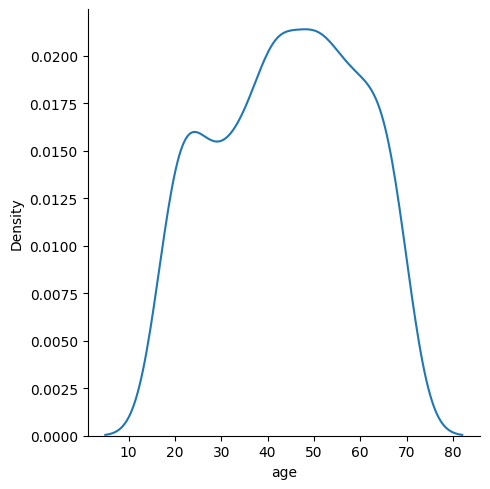

In [5]:
# calling function "get_distribution" to
# get the data distribution of "age"
get_distribution(dataframe=df,featurename='age')

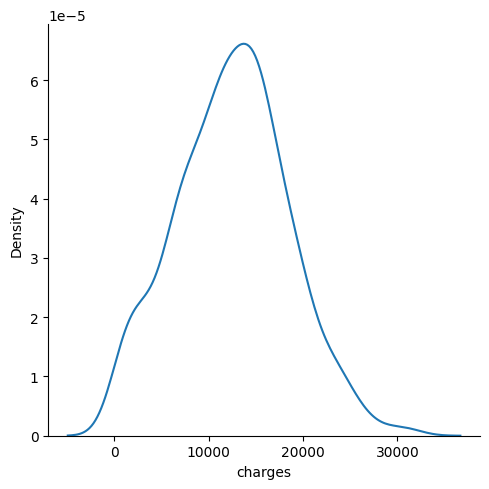

In [6]:
# calling function "get_distribution" to
# get the data distribution of "charges"
get_distribution(dataframe=df,featurename='charges')

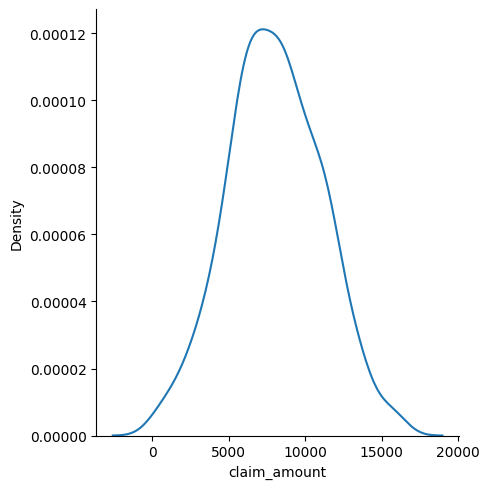

In [7]:
# calling function "get_distribution" to
# get the data distribution of "claim_amount"
get_distribution(dataframe=df,featurename='claim_amount')

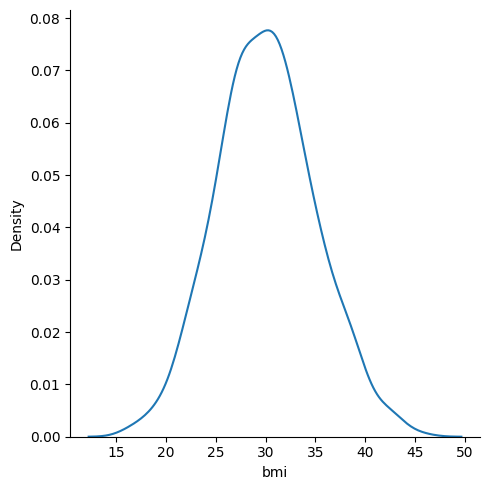

In [8]:
# calling function "get_distribution" to
# get the data distribution of "bmi"
get_distribution(dataframe=df,featurename='bmi')

### conclusion for data distribution

most numeric features are normally or uniformly distributed.

showing very less or no signs of skewness

# Outlier Analysis using BoxPlot

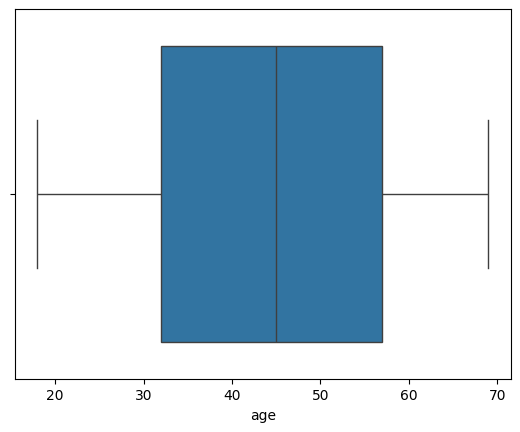

In [9]:
# calling function measure outliers 
# for outliers analysis for "age"
measure_outliers(dataframe=df, featurename='age')

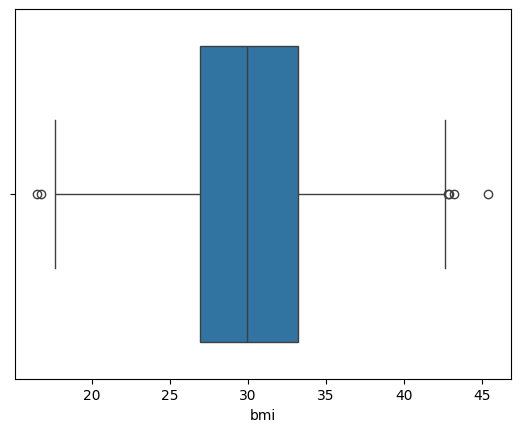

In [10]:
# calling function measure outliers 
# for outliers analysis for "bmi"
measure_outliers(dataframe=df, featurename='bmi')

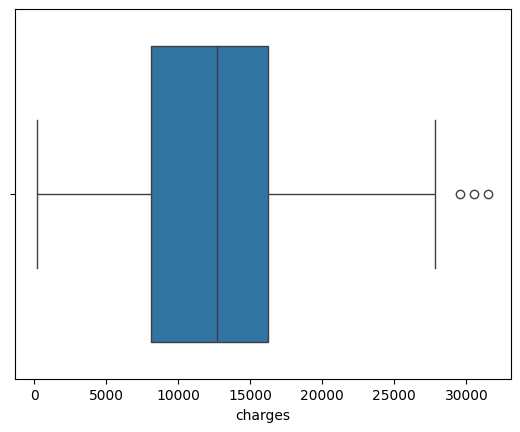

In [11]:
# calling function measure outliers 
# for outliers analysis for "charges"

measure_outliers(dataframe=df, featurename='charges')

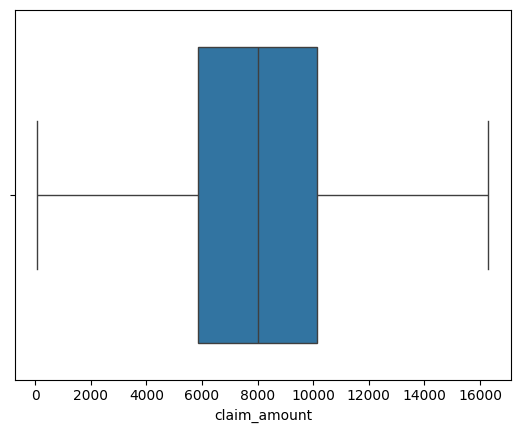

In [12]:
# calling function measure outliers 
# for outliers analysis for "claim amount"

measure_outliers(dataframe=df, featurename='claim_amount')

#### Conclusions for Outliers Analysis

1. Features 'age' and 'claim_amount' has no outliers

2. Features 'bmi' and 'charges' contains very less amount of outliers

# Distribution of Data for Categorical Features

In [13]:
# calling the function "count_categorivcal_values" 
# to get the data distribution among the
# categorical columns
count_categorivcal_values(dataframe=df)

gender
Male      262
Female    238
Name: count, dtype: int64

smoker
No     388
Yes    112
Name: count, dtype: int64

region
northeast    136
southwest    126
southeast    124
northwest    114
Name: count, dtype: int64



# Measuring the central tendencies

In [14]:
# calling function "measure_central_tendencies"
# to measure the central tendencies (mean, median, mode, variance)
# for the numerical columns
measure_central_tendencies(dataframe=df)

age
mean: 44.22 median: 45.0 variance: 226.0837675350701

bmi
mean: 30.0742 median: 29.95 variance: 24.436908176352706

children
mean: 1.992 median: 2.0 variance: 2.048032064128256

charges
mean: 12491.01612 median: 12677.95 variance: 35232779.9982823

hospital_visits
mean: 4.472 median: 5.0 variance: 8.674565130260522

pre_existing
mean: 0.294 median: 0.0 variance: 0.20797995991983964

claim_amount
mean: 8010.91562 median: 8000.57 variance: 9508288.396211036

claim_approved
mean: 0.908 median: 1.0 variance: 0.08370340681362728



# Performing Data Analysis

  smoker       charges
0     No  12369.951082
1    Yes  12910.420000


<Axes: xlabel='smoker', ylabel='charges'>

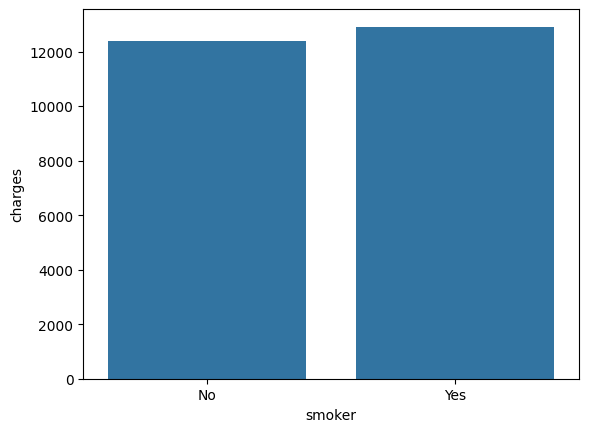

In [15]:
charges_by_smoker = df.groupby('smoker')['charges'].mean().reset_index()
print(charges_by_smoker)

sns.barplot(data=charges_by_smoker, x='smoker', y='charges')

### Conclusion

the average charges for people who smoke is slightly higher than people who don't smoke

<Axes: xlabel='claim_amount', ylabel='charges'>

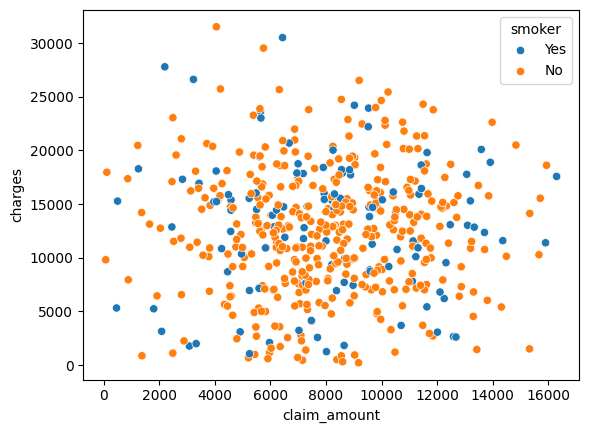

In [16]:
sns.scatterplot(data=df, x='claim_amount', y='charges', hue='smoker')

<Axes: xlabel='claim_amount', ylabel='charges'>

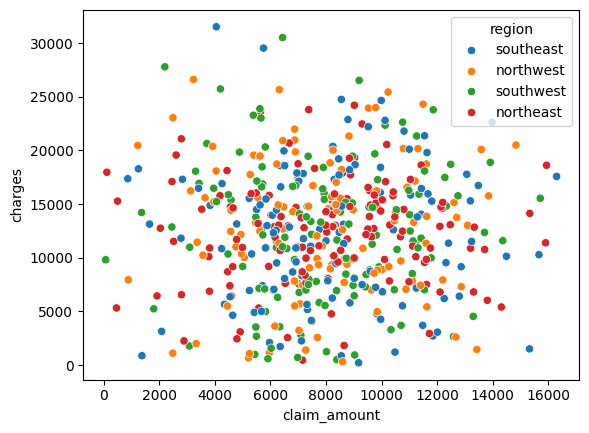

In [17]:
sns.scatterplot(data=df, x='claim_amount', y='charges', hue='region')

In [18]:
claim_approval_by_pre_existing = df.groupby('pre_existing')['claim_approved'].sum().reset_index()
print(claim_approval_by_pre_existing)

   pre_existing  claim_approved
0             0             343
1             1             111


#### conclusion

The total claim approved is more for the people who dosen't have any 

pre-existing claim insurance than people already having insurance.

      region       charges
0  northeast  12426.721544
1  northwest  12890.148596
2  southeast  12371.645403
3  southwest  12316.769524


<Axes: xlabel='region', ylabel='charges'>

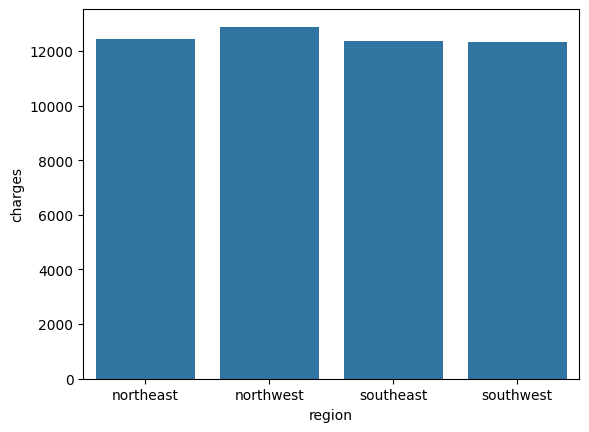

In [19]:
avg_charges_region = df.groupby('region')['charges'].mean().reset_index()
print(avg_charges_region)

sns.barplot(avg_charges_region, x="region",y="charges")

### Conclusion

The charges are higher for NorthWest region than other regions.

The other regions have significantly same amount of charges

      region  claim_amount
0  northeast   8071.743529
1  northwest   7873.494474
2  southeast   8164.672016
3  southwest   7918.277698


<Axes: xlabel='region', ylabel='claim_amount'>

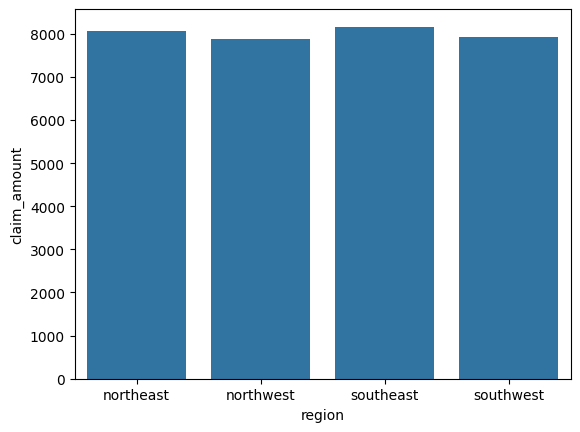

In [20]:
avg_claim_amount_region = df.groupby('region')['claim_amount'].mean().reset_index()
print(avg_claim_amount_region)

sns.barplot(avg_claim_amount_region, x="region",y="claim_amount")

### Conclusion

The claim amoutn is higher in the regions of NorthEast and SouthEast

# correlation analysis using Heatmap

<Axes: >

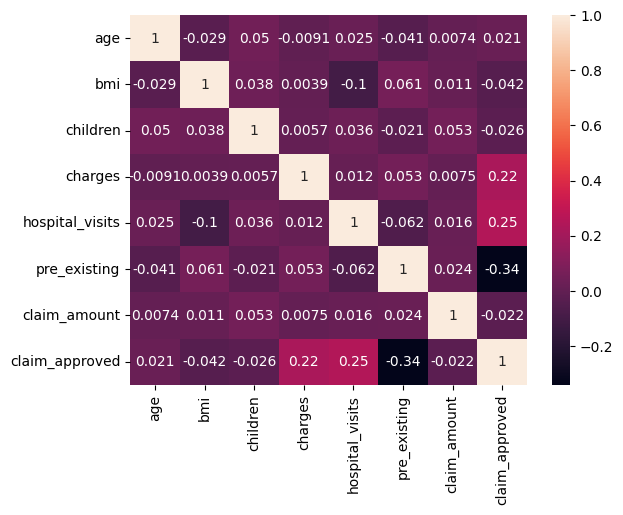

In [21]:
# correlation heatmap
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True)

# Creating dummies for binary variables

In [22]:
encoded_df = pd.get_dummies(df[["gender","smoker"]],drop_first=True).astype('int')

In [23]:
encoded_df

,gender_Male,smoker_Yes
0,0,1
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
495,1,0
496,0,0
497,0,1
498,1,0


# Label Encoding for categorical features

performing label encoding for the features having more that two categories

In [24]:
# using LabelEncoder to transform the data
encoder = LabelEncoder()
df['region'] = encoder.fit_transform(df['region'])

# Dropping the categorical variables

In [25]:
df = df.drop(['claim_id','gender','smoker'],axis=1)

In [26]:
df.head()

,age,bmi,children,region,charges,hospital_visits,pre_existing,claim_amount,claim_approved
0,56,21.5,1,2,15352.62,3,0,8220.30,1
1,69,29.7,3,1,17505.27,7,1,6990.86,1
2,46,31.9,2,2,2714.44,0,0,11847.09,1
3,32,29.8,2,3,21347.81,0,0,11263.22,1
4,60,19.7,2,1,10883.27,4,0,9330.51,1


In [27]:
# concatenating the original and the encoded datasets
# this dataset is the final dataset for performing
# the classification task
df = pd.concat([df,encoded_df],axis=1)

<Axes: >

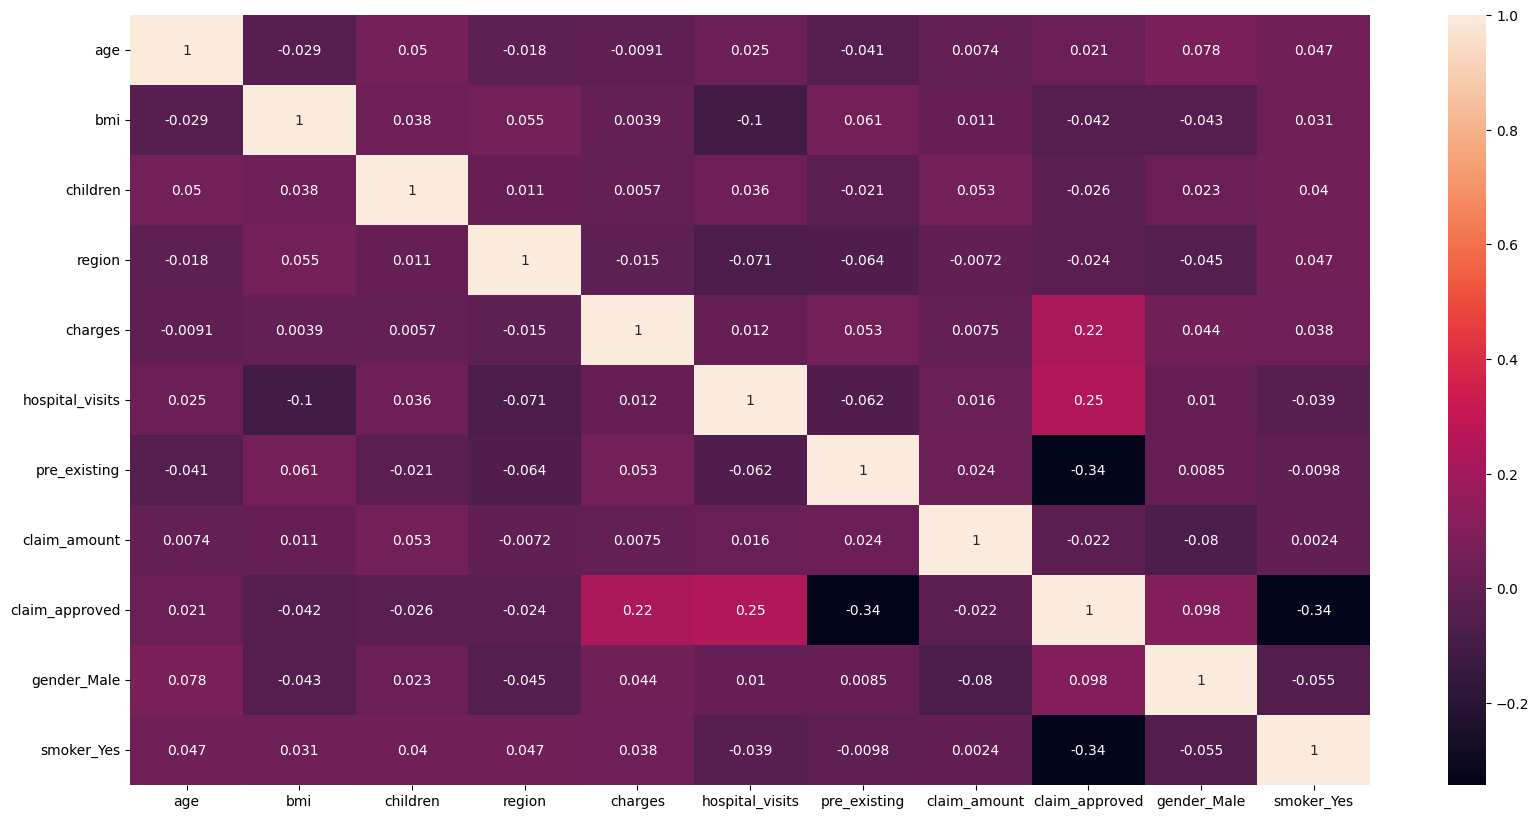

In [28]:
plt.figure(figsize=(20,10))
new_corr = df.corr()
sns.heatmap(new_corr, annot=True)

# Measuring the skewness for the features

In [29]:
age_skewness = measure_skewness(dataframe=df, featurename='age')
print(age_skewness)

-0.11270862750724471


In [30]:
charges_skewness = measure_skewness(dataframe=df, featurename='charges')
print(charges_skewness)

0.11363471389412594


In [31]:
clain_amount_skewness = measure_skewness(dataframe=df, featurename='claim_amount')
print(clain_amount_skewness)

0.04082822922629058


# Splitting the Independent and Dependent features

In [32]:
x = df.drop('claim_approved',axis=1)
y = df['claim_approved']

# Splitting the data into the train and test sets

In [33]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=43,stratify=y)

In [34]:
x_train.shape

(400, 10)

In [35]:
x_train.columns

Index(['age', 'bmi', 'children', 'region', 'charges', 'hospital_visits',
       'pre_existing', 'claim_amount', 'gender_Male', 'smoker_Yes'],
      dtype='object')

# Class Distribution for the dependent feature

In [36]:
df['claim_approved'].value_counts()

claim_approved
1    454
0     46
Name: count, dtype: int64

# Handling Imbalance Dataset

In [37]:
# using SMOTE for handling the
# imbalanced dataset by increasing 
# the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [38]:
print("Original class distribution:", Counter(y_train))
print("After oversampling:", Counter(y_resampled))

Original class distribution: Counter({1: 363, 0: 37})
After oversampling: Counter({1: 363, 0: 363})


# Scaling the features

In [39]:
# since most of the features follows
# a normal distribution "StandardScaler"
# is the most suitable for scaling the features

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_resampled)
x_test_scaled = scaler.transform(x_test)

# Training a Logistic Regression Model

In [51]:
log_reg = LogisticRegression()
training = log_reg.fit(x_train_scaled,y_resampled)
result = training.predict(x_test_scaled)

In [52]:
# classification result for Logistic Regression
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.44      0.89      0.59         9
           1       0.99      0.89      0.94        91

    accuracy                           0.89       100
   macro avg       0.72      0.89      0.76       100
weighted avg       0.94      0.89      0.91       100



# Training a DecisionTree Classifier

In [53]:
tree_classifier = DecisionTreeClassifier(random_state=50)
training_cls = tree_classifier.fit(x_train_scaled,y_resampled)
tree_result = training_cls.predict(x_test_scaled)

In [54]:
# accuracy for DecisionTree Classifier
print(classification_report(y_test,tree_result))

              precision    recall  f1-score   support

           0       0.38      0.67      0.48         9
           1       0.96      0.89      0.93        91

    accuracy                           0.87       100
   macro avg       0.67      0.78      0.70       100
weighted avg       0.91      0.87      0.89       100



# HyperParameter Tuning for DecisionTree

In [44]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit to training data
grid_search.fit(x_train_scaled, y_resampled)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [45]:
best_tree = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [46]:
# traing the DT Classifier using the optimized parameters
dt_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=20, max_features='log2',min_samples_leaf=1,min_samples_split=2)
dt_training = dt_classifier.fit(x_train_scaled,y_resampled)
dt_result = dt_training.predict(x_test_scaled)

In [47]:
dt_result

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [48]:
# classification report after 
# training with optimized parameters
print(classification_report(y_test,dt_result))

              precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.98      0.93      0.96        91

    accuracy                           0.92       100
   macro avg       0.76      0.86      0.80       100
weighted avg       0.94      0.92      0.93       100



## Final Conclusions for model

The dataset used in this analysis is significantly limited in size, which restricts the robustness and generalizability of any classification model. Despite this limitation, preliminary model testing was carried out to identify the most suitable approach given the current data.

Among the models evaluated, the Decision Tree Classifier outperformed the Logistic Regression model in terms of overall classification performance after performing the HyperParameter Tuning. To enhance its effectiveness, hyperparameter tuning was applied to the Decision Tree model, which improved its accuracy from 87% to 92%.

While these results are promising, they should be interpreted with caution due to the small sample size. For more reliable conclusions, further data collection is recommended.